# Your Details

Your Name: Dylan Rodrigues

Your ID Number: 24121479

# Etivity 1 - Task 2: Deep Neural Network Application for Dog vs. Cat Classification

You will need to have completed Task 1 of Etivity 1! in order to do this assignment.

To build your dog vs. cat binary classifier, you'll use the functions from the previous assignment to build a deep network. You can download these helper functions pre-completed, however they are encrpyted to preserve the integrity of Etivity 1 - Task 1. Hopefully, you'll begin to see the power of deep layer networks as way of classifying input features. 

**After this assignment you will be able to:**

- Section 4: Exercise 1: Build and train a 2-layer neural network model, and apply it to supervised learning. 
- Section 5: Exercise 2: Build and train a deep L-layer neural network model, and apply it to supervised learning.

Let's get started!

## Important Note on Submission 

There are 2 exercises to complete in this task. Use notes provided to help you build understanding. Insert your code entries for each of these exercises. Please make sure to enter your code after this line so that grading can easily be assessed.

**\# ENTER CODE HERE**

Please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

## Table of Contents
- [1 - Packages](#1)
- [2 - Load and Process the Dataset](#2)
- [3 - Model Architecture](#3)
    - [3.1 - 2-layer Neural Network](#3-1)
    - [3.2 - L-layer Deep Neural Network](#3-2)
    - [3.3 - General Methodology](#3-3)
- [4 - Two-layer Neural Network](#4)
    - [Exercise 1 - two_layer_model](#ex-1)
    - [4.1 - Train the model](#4-1)
- [5 - L-layer Neural Network](#5)
    - [Exercise 2 - L_layer_model](#ex-2)
    - [5.1 - Train the model](#5-1)
- [6 - Results Analysis](#6)
- [7 - Test with your own image (optional/ungraded exercise)](#7)

<a name='1'></a>
## 1 - Packages

Begin by importing all the packages you'll need during this assignment. 

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- [cv2](https://pypi.org/project/opencv-python/) Opencv is a library of programming functions mainly aimed at real-time computer vision and is mainly used to do all the operation related to images.
- [os](https://docs.python.org/3/library/os.html)  This package provides a portable way of using operating system dependent functionality.
- [glob](https://docs.python.org/3/library/glob.html) is a useful package for manipulating paths names according to unix style format.
- [pandas](https://pandas.pydata.org/) is a powerful, flexible and easy to use open source data analysis and manipulation tool that also allows us to plot data visually.
- [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html) is a package that has efficient tools for predictive data analyis. The shuffle operator can shuffle arrays or sparse matrices in a consistent way.
- `dnn_functions_v2` provides the encrypted functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook. You will need to unzip the "dist_images.zip" into the "dist" and "images" folder into your directory structure.
- `np.random.seed(1)` is used to keep all the random function calls consistent. It helps grade your work - so please don't change it! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import glob as gb
import cv2
import pandas as pd

from PIL import Image
from scipy import ndimage
from sklearn.utils import shuffle
os.chdir ("dist")
from dnn_functions_v2 import *
os.chdir ("..")

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

<a name='2'></a>
## 2 - Load and Process the Dataset

You'll be using a subset of the images  from the well known "Dogs vs Cats" [Kaggle](https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats) dataset to run a binary classification exercise. This dataset has 12,500 images in total. For this assignment, we will only used a subset number of these images to help keep training time in check!

**Problem Statement**: You are given a dataset  containing 1250 images of cats and dogs with a 50% split: Here, we will create
    - a training set of `m_train` images labelled as cat (0) or dog (1) and
    - a test set of `m_test` images labelled as cat (0) and dog (1)
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cells below.

In [2]:
trainpath = "./dataset"
file = os.listdir(trainpath)
print(f'For this training dataset, there are {len(file)} Photos')

For this training dataset, there are 1250 Photos


In [3]:
# The  database contains images of varying sizes. This code sets the image pixel size to 64*64 while importing into the X_train dataset.
# The for loop looks for 'dog' images based on the associated filenames and generates labels for the Y_train dataset
# The label is 1: Dog and 0: Cat.
size = 64
X_train = []
Y_train = []
X_title = []

files = gb.glob(pathname = str( trainpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X_train.append(list(image_array))
    file=file.split('/')[-1]
    sep=file.split('.')[0]
    X_title.append(sep)
    if(sep == 'dog'):
        Y_train.append(1)
    else:
        Y_train.append(0)

In [4]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_title = np.array(X_title)

print(f'X_train shape  is {X_train.shape}')
print(f'Y_train shape  is {Y_train.shape}')
print('Size of image = ',np.array(X_train[5]).shape)

X_train shape  is (1250, 64, 64, 3)
Y_train shape  is (1250,)
Size of image =  (64, 64, 3)


In [5]:
X_title

array(['cat', 'cat', 'dog', ..., 'cat', 'dog', 'cat'], dtype='<U3')

Run the following cell to create a train/test dataset split of 80:20%  The sklearn library 'shuffle' command organises datasets into a random mixture of cat and dog pictures. Using pd.Series...plot(), a 50/50 split of cat/dog images is observed in the original X_train dataset.

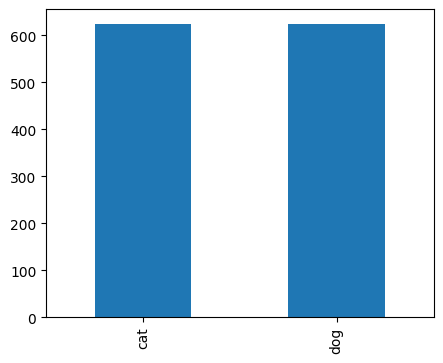

In [6]:
X_train, Y_train, X_title = shuffle(X_train, Y_train, X_title, random_state=True)

X_Train=X_train[:1000]
Y_Train=Y_train[:1000]
X_Title=X_title[:1000]

X_Test=X_train[1000:]
Y_Test=Y_train[1000:]
Y_Title=X_title[1000:]

pd.Series(X_title).value_counts().plot.bar()
plt.show()

In [7]:
#Note that this is another way of spliting the dataset using sklearn train_test_split()
#from sklearn.model_selection import train_test_split
#X_Train, X_Test, Y_Train, Y_Test, = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)
#pd.Series(X_title).value_counts().plot.bar()

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to check out other images. 

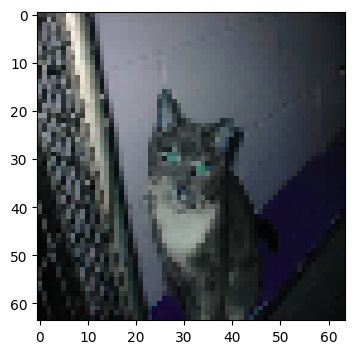

y = 0. It's a cat picture.


In [8]:
# Example of a picture
index = 7
classes = ['cat', 'dog']
plt.imshow(X_Train[index])
plt.show()
print ("y = " + str(Y_Train[index]) + ". It's a " + classes[Y_Train[index]]  +  " picture.")

In [9]:
# Explore your dataset 
m_train = X_Train.shape[0]
m_test = X_Test.shape[0]
num_px = X_Train.shape[1]

#Need to reshape Y label into a single row array for the Deep Layer Neural Networks
Y_Train = Y_Train.reshape(1,Y_Train.shape[0])
Y_Test = Y_Test.reshape(1,Y_Test.shape[0])

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("Train_x shape: " + str(X_Train.shape))
print ("Train_y shape: " + str(Y_Train.shape))
print ("Test_x shape: " + str(X_Test.shape))
print ("Test_y shape: " + str(Y_Test.shape))

Number of training examples: 1000
Number of testing examples: 250
Each image is of size: (64, 64, 3)
Train_x shape: (1000, 64, 64, 3)
Train_y shape: (1, 1000)
Test_x shape: (250, 64, 64, 3)
Test_y shape: (1, 250)


As usual, you reshape and standardise the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvector_dog_reshaped.png" style="width:450px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Image to vector conversion.</font></center></caption>

In [10]:
# Reshape the training and test examples 
train_x_flatten = X_Train.reshape(X_Train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_Test.reshape(X_Test.shape[0], -1).T

# Standardise data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

train_y = Y_Train;
test_y = Y_Test;
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 1000)
test_x's shape: (12288, 250)


**Note**:
$12,288$ equals $64 \times 64 \times 3$, which is the size of one reshaped image vector.

<a name='3'></a>
## 3 - Model Architecture

<a name='3-1'></a>
### 3.1 - 2-layer Neural Network

Now that you're familiar with the dataset, it's time to build a deep neural network to distinguish dog images from cat images!

You're going to build two different models:

- A 2-layer neural network
- An $L$-layer deep neural network

Then, you'll compare the performance of these models, and try out some different values for $L$. 

Let's look at the two architectures:

<img src="images/2layerNN_dog.png" style="width:650px;height:400px;">
<caption><center><font color='purple'><b>Figure 2</b>: 2-layer neural network. <br> The model can be summarised as: INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT.</font></center></caption>

<u><b>Detailed Architecture of Figure 2</b></u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- Then, add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- Repeat the same process.
- Multiply the resulting vector by $W^{[2]}$ and add the intercept (bias). 
- Finally, take the sigmoid of the result. If it's greater than 0.5, classify it as a dog.

<a name='3-2'></a>
### 3.2 - L-layer Deep Neural Network

It's pretty difficult to represent an L-layer deep neural network using the above representation. However, here is a simplified network representation:

<img src="images/LlayerNN_dog.png" style="width:650px;height:400px;">
<caption><center><font color='purple'><b>Figure 3</b>: L-layer neural network. <br> The model can be summarised as: [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID</font></center></caption>

<u><b>Detailed Architecture of Figure 3</b></u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, take the sigmoid of the final linear unit. If it is greater than 0.5, classify it as a dog.

<a name='3-3'></a>
### 3.3 - General Methodology

As usual, you'll follow the Deep Learning methodology to build the model:

1. Initialise parameters / Define hyperparameters
2. Loop for num_iterations:
    a. Forward propagation
    b. Compute cost function
    c. Backward propagation
    d. Update parameters (using parameters, and grads from backprop) 
3. Use trained parameters to predict labels

Now go ahead and implement those two models!

<a name='4'></a>
## 4 - Two-layer Neural Network

<a name='ex-1'></a>
### Exercise 1 - two_layer_model 

Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions and their inputs are:
```python
def initialise_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [11]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layer_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [12]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if dog), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimisation loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layer_dims
    
    # Initialise parameters dictionary, by calling one of the functions you'd previously implemented
    # ENTER CODE HERE (~ 1 line of code)
    parameters = initialise_parameters(n_x, n_h, n_y)

   
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        # ENTER CODE HERE (~ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        # ENTER CODE HERE (~ 1 line of code)
        cost = compute_cost(A2, Y) 
        
        # Initialising backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        # ENTER CODE HERE (~ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        # ENTER CODE HERE (~ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)

        
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [13]:
parameters, costs = two_layer_model(train_x, train_y, layer_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=True)

Cost after iteration 0: 0.6930273248536079
Cost after iteration 1: 0.6930219444995003


**Expected output:**

```
cost after iteration 1 must be around 0.69
```

<a name='4-1'></a>
### 4.1 - Train the model 

If your code passed the previous cell, run the cell below to train your parameters. 

- The cost should generally decrease on every iteration. 

- It may take up to 5 minutes to run 3000 iterations. 

Cost after iteration 0: 0.6930273248536079
Cost after iteration 100: 0.692542507420696
Cost after iteration 200: 0.6914548998887333
Cost after iteration 300: 0.6891289788663212
Cost after iteration 400: 0.6846927150174827
Cost after iteration 500: 0.6774418402731974
Cost after iteration 600: 0.6674144252159777
Cost after iteration 700: 0.6545966780832666
Cost after iteration 800: 0.6386841945886984
Cost after iteration 900: 0.6206024461314843
Cost after iteration 1000: 0.6013740355761868
Cost after iteration 1100: 0.5818985696237308
Cost after iteration 1200: 0.5637123047384319
Cost after iteration 1300: 0.5763333837388747
Cost after iteration 1400: 0.5731662258172797
Cost after iteration 1500: 0.5674815787807227
Cost after iteration 1600: 0.5597420163939285
Cost after iteration 1700: 0.5502511283224821
Cost after iteration 1800: 0.5427244092551763
Cost after iteration 1900: 0.5369495217764555
Cost after iteration 2000: 0.5289638200127913
Cost after iteration 2100: 0.5216973094233189
C

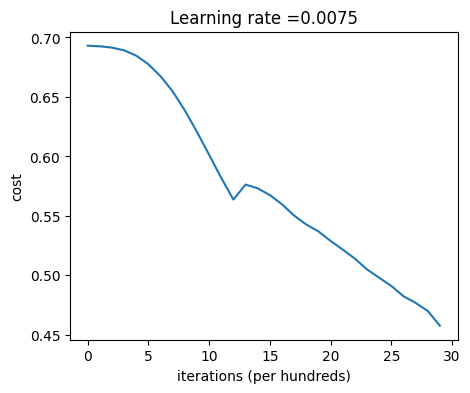

In [14]:
parameters, costs = two_layer_model(train_x, train_y, layer_dims = (n_x, n_h, n_y), num_iterations = 3000, print_cost=True)
plot_costs(costs, learning_rate)

**Nice!** You trained the model. It's a good thing you built a vectorised implementation, otherwise it might have taken 10 times longer to train this!

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [15]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.7660000000000002


In [16]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.54


### Nicely done! It seems as if your 2-Layer NN model has achieved some level of performance. 
**Note** that this 2-layer network size is not really suitable for the dogs vs. cat binary classification job! Comment on the results and any differences between the training and test set prediction results. Are these results what you would have expected? What modifications could potentially improve the outcome without changing the size of the network?

### <span style='color: red;'>Insert your comments in this markdown cell here.</span> ###



The 2-layer neural network achieves 76.6% on the training set but only 54% on the test set, demonstrating overfitting—a phenomenon where the model memorizes training data but fails to generalize .The outcome is expectable because shallow networks lack the capacity to learn high-level features necessary for complicated tasks like image classification (Goodfellow et al., 2016, Chapter 6). To improve performance without increasing the network size, techniques such as L2 regularization (weight decay) and dropout can dampen overfitting by restricting parameter growth and adding noise to training (Goodfellow et al., 2016, Chapter 7.5). Additionally, batch normalization can stabilize learning by normalizing activations, leading to faster convergence and improved generalization (Goodfellow et al., 2016, Chapter 8.7).

## Let's see if you can do even better with an $L$-layer model.

<a name='5'></a>
## 5 - L-layer Neural Network

<a name='ex-2'></a>
### Exercise 2 - L_layer_model 

Use the helper functions you implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions and their inputs are:
```python
def initialise_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [17]:
### CONSTANTS ###
layer_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [18]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if dog), of shape (1, number of examples)
    layer_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimisation loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialisation.
    # ENTER CODE HERE (~ 1 line of code)
    parameters = initialise_parameters_deep(layer_dims)

    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        # ENTER CODE HERE (~ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        # ENTER CODE HERE (~ 1 line of code)
        cost = compute_cost(AL, Y)

    
        # Backward propagation.
        # ENTER CODE HERE (~ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
   
 
        # Update parameters.
        # ENTER CODE HERE (~ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)

                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs


In [19]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, num_iterations = 2, print_cost = True)

Cost after iteration 0: 0.7215139242969361
Cost after iteration 1: 0.6955380413876902


**Expected output:**

```
cost after iteration 1 must be around 0.69
```

<a name='5-1'></a>
### 5.1 - Train the model 

If your code passed the previous cell, run the cell below to train your model as a 4-layer neural network. 

- The cost should generally decrease over the number of iterations. 
- It may take up to 10 minutes to run 3000 iterations. 

Cost after iteration 0: 0.7215139242969361
Cost after iteration 100: 0.6704051720795353
Cost after iteration 200: 0.6671255882144634
Cost after iteration 300: 0.638331261305021
Cost after iteration 400: 0.6531014876943609
Cost after iteration 500: 0.646436062004047
Cost after iteration 600: 0.5863542114234702
Cost after iteration 700: 0.5532421052279202
Cost after iteration 800: 0.5270521847237639
Cost after iteration 900: 0.5194752435395616
Cost after iteration 1000: 0.5953956967481726
Cost after iteration 1100: 0.478641719586411
Cost after iteration 1200: 0.43317999781750305
Cost after iteration 1300: 0.4057921894879887
Cost after iteration 1400: 0.42539929044448666
Cost after iteration 1500: 0.35989346178453535
Cost after iteration 1600: 0.34955590742930837
Cost after iteration 1700: 0.3655406247265862
Cost after iteration 1800: 0.3549855281754072
Cost after iteration 1900: 0.2997379168913107
Cost after iteration 2000: 0.3408280002126354
Cost after iteration 2100: 0.2702796753145145

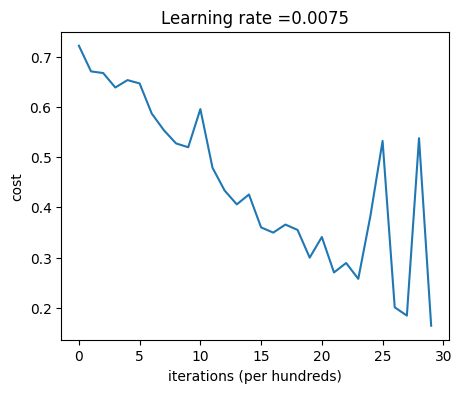

In [20]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, num_iterations = 3000, print_cost = True)
plot_costs(costs, learning_rate)

In [21]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9910000000000004


In [22]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5920000000000001


### Congratulations if your 4-layer neural network model has achieved better performance than your 2-layer model. This is a pretty good outcome for this task!

**Note**: Comment on the results and any differences between the training and test results. Are these results what you would have expected compared to the 2-layer model? What approaches to the model could you make to improve the outcome? (Try implementing any of these). Comment on the limitations of this classification dataset task using an L-layer model.

### <span style='color: red;'>Insert your comments in this markdown cell here.</span> ###

The 4-layer network significantly outperforms the 2-layer model on the training set (99.1% compared to 76.6% accuracy), yet test accuracy remains relatively low (59.2% compared to 54%), which points to overfitting. This is to be anticipated, given that deeper networks can model complex patterns but are also more prone to memorize training data rather than generalize (Deep Learning, Goodfellow et al., 2016, Chapter 7.2). In the case of 4-layer NN too, to improve generalization, techniques such as L2 regularization and dropout can be employed to restrict parameter growth and increase robustness (Goodfellow et al., Chapter 7.1). Data augmentation (Goodfellow et al., Chapter 14.6) can also improve performance by exposing the model to more variations. However, the dataset itself can be a limitation—if training and test distributions are vastly different or if the dataset is not diverse enough, even an L-layer model may not generalize well (Goodfellow et al., Chapter 5.2).

<a name='6'></a>
##  6 - Results Analysis

Let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

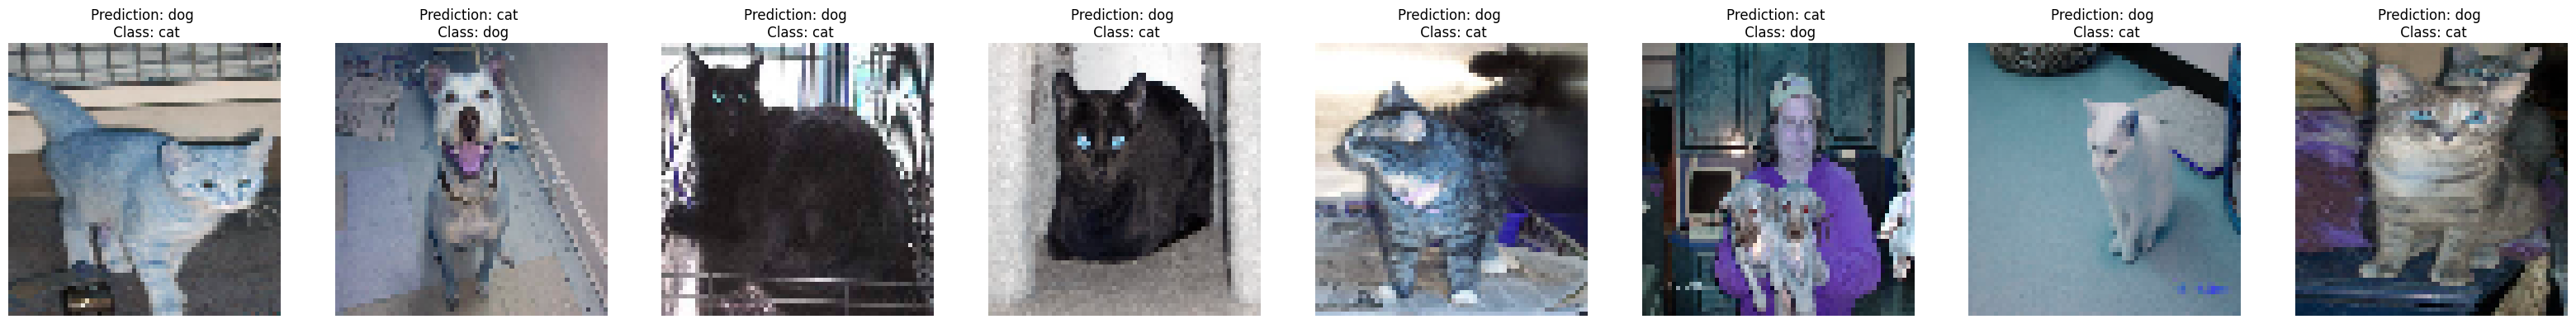

In [23]:
print_mislabeled_images(classes, test_x, test_y, pred_test)
plt.show()

**A few types of images the model tends to do poorly on include:** 
- Unusual cat/dog color and species.
- Animal body is in an unusual position.
- Animal appears against a background of a similar color.
- Camera angle is different.
- Brightness of the picture.
- Scale variation (size of dog/cat is very large or small in image).

### Well done on finishing this assignment! 

You just built and trained a deep L-layer neural network to distinguish dogs from cats. A nice introduction to deep learning. ;) 

If you'd like to test the model out further - there's an optional extra exercise below, where you can test your own image. 

<a name='7'></a>
## 7 - Test with your own image (optional exercise) ##

You can use your own image to test the output of your model. To do that follow these steps:

1. Click on "File" in the upper bar of this Notebook, then click "Open" to go on your home directory.
2. Add your image to this Notebook's directory, in the "images" folder
3. Change your image's name in the following code
4. Run the code and check if the algorithm is right (0 = cat, 1 = dog)!

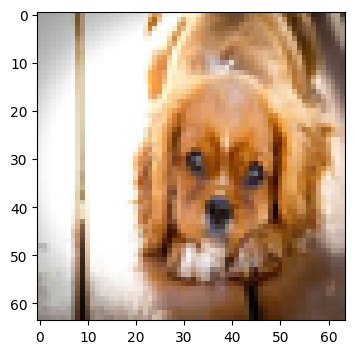

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "dog" picture.


In [24]:
## MODIFY THIS CODE HERE ##
my_image = "puppy.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (0 -> cat, 1 -> dog )
## MODIFICATION ENDS HERE ##

fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.figure(figsize=(4,4)) # NOTE: I have added this extra line so that the output picture looks small, not blurry and good
plt.imshow(image)
plt.show()

image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image))] +  "\" picture.")